# Churn Analysis

The dataset that is being analysed contains information about the churn of customers from a company. In this analysis I am creating a Random Forest model, in order to identify potential leaving customers. In addition, the model enables the analysis of the dataset, allowing the identification of potential causes for the churn.

## Table of Contents

- [Setup](#setup)
- [Model training and Evaluation](#model-training-and-evaluation)
- [Probability of Churning](#probability-of-churning)
- [Visualization](#visualization)
- [Conclusion](#conclusion)

## Setup

The first part includes importing packages, loading the dataset and data preprocessing.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pointbiserialr



# Load the dataset.
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")



# Data preprocessing.

# Handle missing values, all the TotalCharges are converted to numeric, the ones that can't are replaced with NaN.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Replace NaN values with the median of all the values, since the median is less sensitive to outliers compared to the mean.
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

# Convert categorical variables to one-hot encoded format, making it usable in the Random Forest algorithm.
data_encoded = pd.get_dummies(data, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                             'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                             'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                             'PaperlessBilling', 'PaymentMethod'])

## Model training and Evaluation

Now we train the model using the data in the customer churn dataset. After training the model we evaluate it.

We are using the Random Forest model, due to its ease of use and flexibility. Since the goal is to predict the customers that are likely to churn in the future. I opted out of using Principal Component Analysis, since while it can assist in determining the relationship between variables, it's not suitable for accurate prediction.

The metrics for evaluation are:
- Accuracy (ratio of correct predictions to the predictions made)
- Precision (ratio of true positive prediction to the positive predictions made)
- Recall (ratio of true positive predictions to actual positives)
- F1 Score (harmonic mean of precision and recall)

In [3]:
# Preparing the data for the training algorithm.

# Split the data into features and target variable. Also drop the customerID, since it does not provide predictive value.
X = data_encoded.drop(['customerID', 'Churn'], axis=1)
y = data_encoded['Churn']



# Split the data into training and testing sets for the Random Forest algorithm.

# Data is split, with 80% used for training and 20% for testing.
# The random state is set, in order to ensure the reproducibility of the training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a Random Forest classifier.
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



# Evaluate the model.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.7963094393186657

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1036
         Yes       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



## Probability of Churning

For future analysis, let's calculate the probability of churning for each non-churned customer, using our trained model.

After we have calculated the probability, let's get the customerIDs of all the customers who are over the threshold probability of churning (currently set to 60%), in order for the company to take preventative action.

In [4]:
# The probability of churning for non-churned customers.

# Filter non-churned customers from the encoded dataset.
non_churned_data = data_encoded[data_encoded['Churn'] == 'No']

# Store the customer IDs before removing the column, in order to match them later.
customer_ids = non_churned_data['customerID'].copy()

# Drop the 'Churn' and 'customerID' column from the non-churned customers dataset.
non_churned_data = non_churned_data.drop(['customerID', 'Churn'], axis=1)

# Calculate the probability of churn for the non-churned customers.
non_churned_probabilities = clf.predict_proba(non_churned_data)[:, 1]



# Get a list of customerIDs likely to churn.

# Match the customerIDs to the probabilities, since they both have retained their original indices.
customer_churn_probabilities_with_ID = pd.DataFrame({'customerID': customer_ids,
                                             'Churn Probability': non_churned_probabilities})

# Define the threshold probability for considering a customer to have a high likelihood of churning.
threshold = 0.6

# Filter non-churned customers with high likelihood of churning.
high_likelihood_churn_customers = customer_churn_probabilities_with_ID[customer_churn_probabilities_with_ID['Churn Probability'] > threshold]

# Extract customerIDs of high likelihood churn customers.
high_likelihood_churn_customerids = high_likelihood_churn_customers['customerID'].tolist()

# Display the list of customerIDs.
print("List of customerIDs with a high likelihood of churning:")
print(high_likelihood_churn_customerids)

List of customerIDs with a high likelihood of churning:
['4929-XIHVW', '3577-AMVUX', '9094-AZPHK', '5348-CAGXB', '4741-WWJQZ', '6198-ZFIOJ', '4291-HPAXL', '8714-CTZJW', '9314-IJWSQ', '9957-YODKZ', '1219-NNDDO', '6407-UTSLV', '8356-WUAOJ', '3566-HJGPK', '7243-LCGGZ', '4137-BTIKL', '9779-DPNEJ', '3496-LFSZU', '8064-RAVOH', '7176-WIONM', '1197-BVMVG', '4927-WWOOZ', '7145-FEJWU', '2792-LSHWX', '5542-TBBWB', '5906-BFOZT', '1666-JXLKU', '3629-ZNKXA', '4132-KALRO', '1640-PLFMP', '2545-EBUPK', '1855-AGAWH', '1335-NTIUC', '2880-FPNAE', '4634-JLRJT', '5600-KTXFM', '7225-CBZPL', '4098-NAUKP', '8161-QYMTT', '8450-UYIBU', '7181-OQCUT', '1905-OEILC', '7858-GTZSP', '9133-AYJZG', '2277-VWCNI', '8180-AKMJV', '5117-IFGPS', '3001-UNBTL', '4060-LDNLU', '4273-MBHYA', '2275-RBYQS', '3841-CONLJ', '3785-NRHYR', '4686-UXDML', '3349-ANQNH', '2905-KFQUV', '1628-BIZYP', '4367-NHWMM', '9962-BFPDU', '5442-BHQNG', '3162-KKZXO', '5119-NZPTV', '4062-HBMOS', '1226-IENZN']


## Visualization

Let's start visualizing our dataset. 

The first graph is the density of non-churned customers, according to the probability of churning, in order to determine the spread of customers according to churn probability.

In the second graph, we are sorting the features according to the importance of the features in determining the likelihood of churning with our Random Forest model.

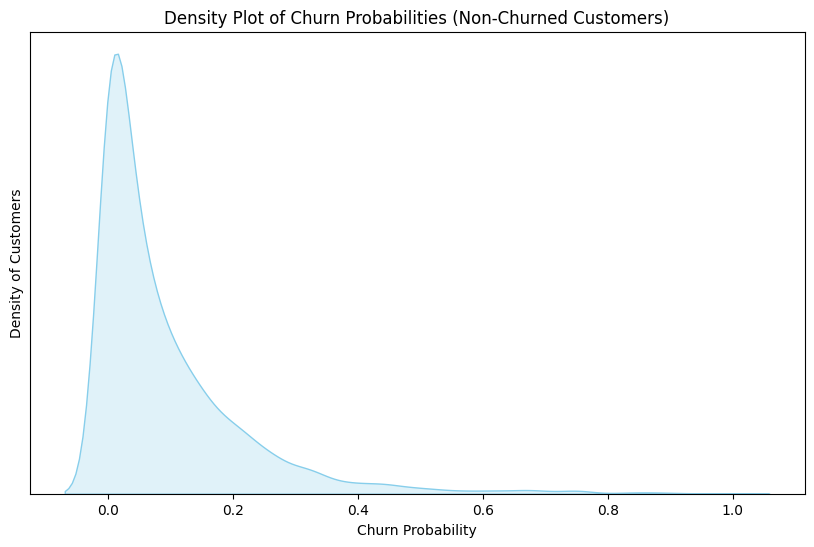

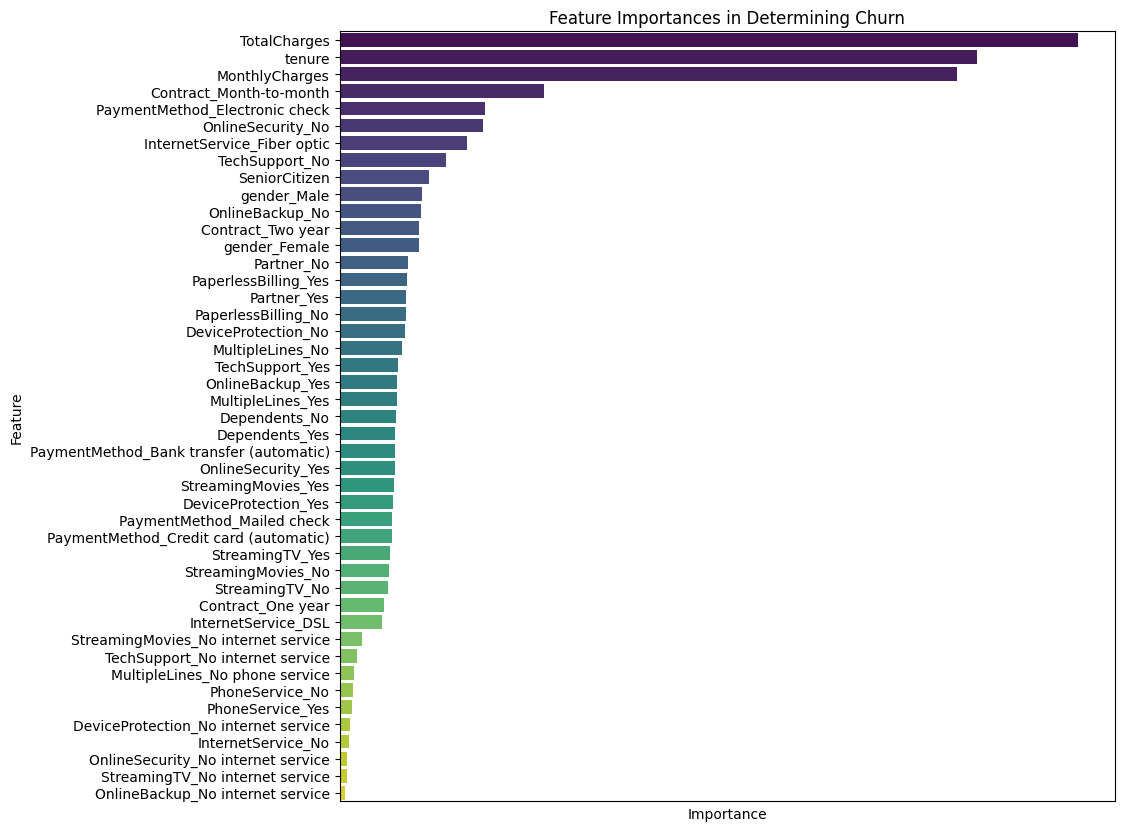

In [5]:
# Plot density plot of churn probabilities, to visualize the spread of customers that are likely to churn or not.
plt.figure(figsize=(10, 6))
sns.kdeplot(non_churned_probabilities, color='skyblue', fill=True)
plt.title('Density Plot of Churn Probabilities (Non-Churned Customers)')
plt.xlabel('Churn Probability')
plt.ylabel('Density of Customers')
plt.gca().set_yticks([])
plt.show()



# Sort feature importances in descending order.
feature_importances = clf.feature_importances_
feature_names = non_churned_data.columns
indices = feature_importances.argsort()[::-1]

# Plot feature importances, in order to determine which features are important in contributing to churn.
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_importances[indices], y=feature_names[indices], palette="viridis", hue=feature_names[indices], legend=False)
plt.title('Feature Importances in Determining Churn')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().set_xticks([])
plt.show()

From the first graph we can see, that the vast majority of customers are not likely to churn. Only a fraction of the customers have a probability of churning that is over 40%.

From the second graph we can determine, that the features most important in contributing to churn are TotalCharges, tenure and MonthlyCharges. 

Let's plot the features in order to determine, what values of the features have a difference in Churned and non-Churned customers. 

Additionally, let's plot the density of people likely to churn according to these features.

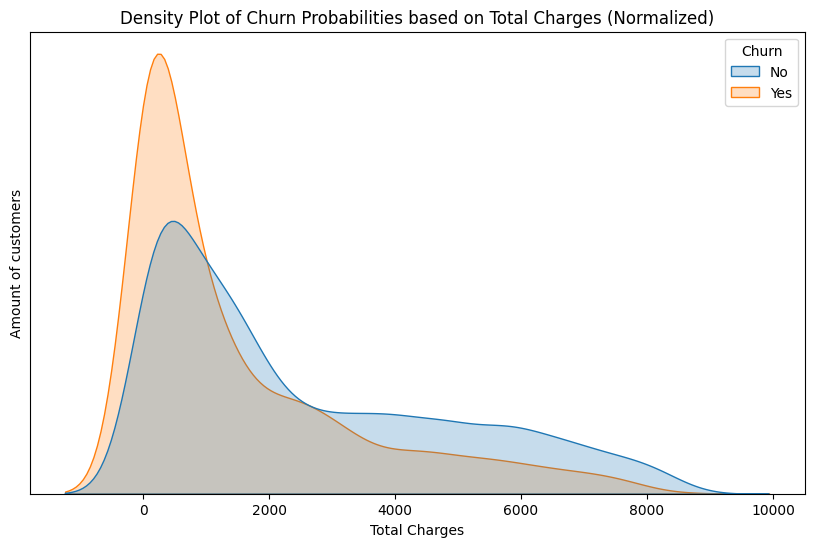

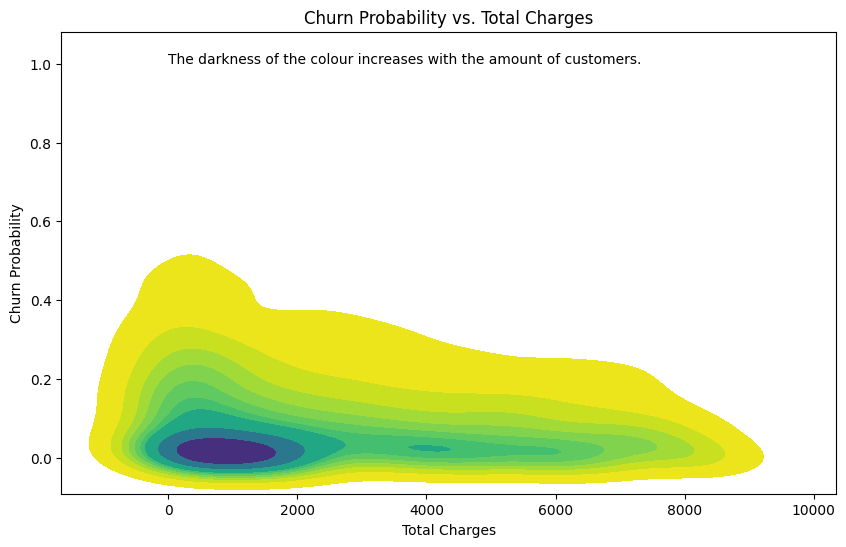

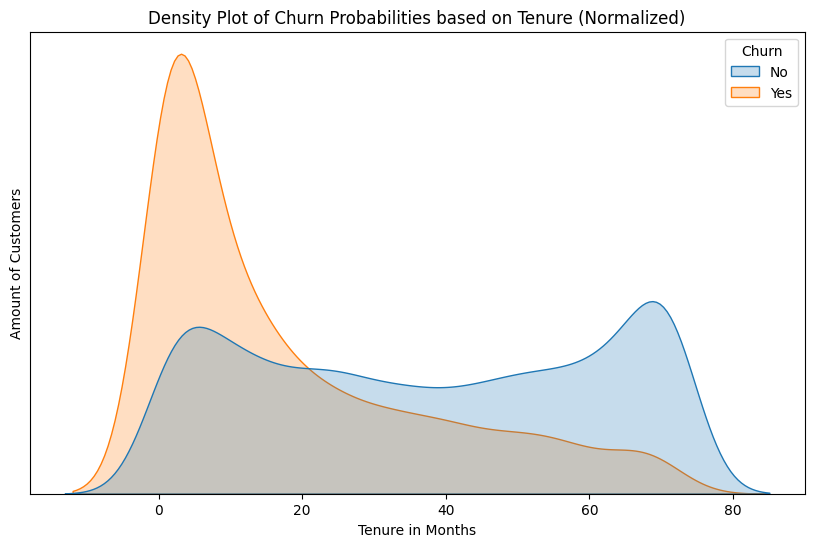

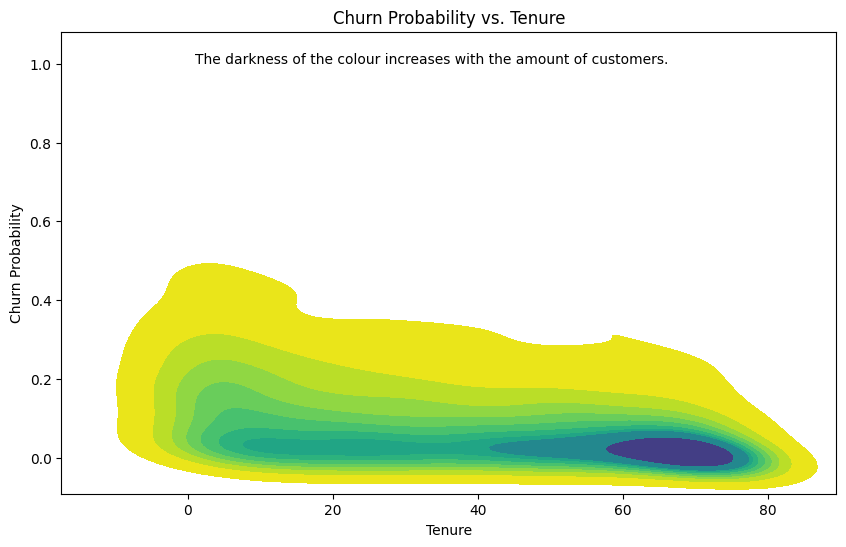

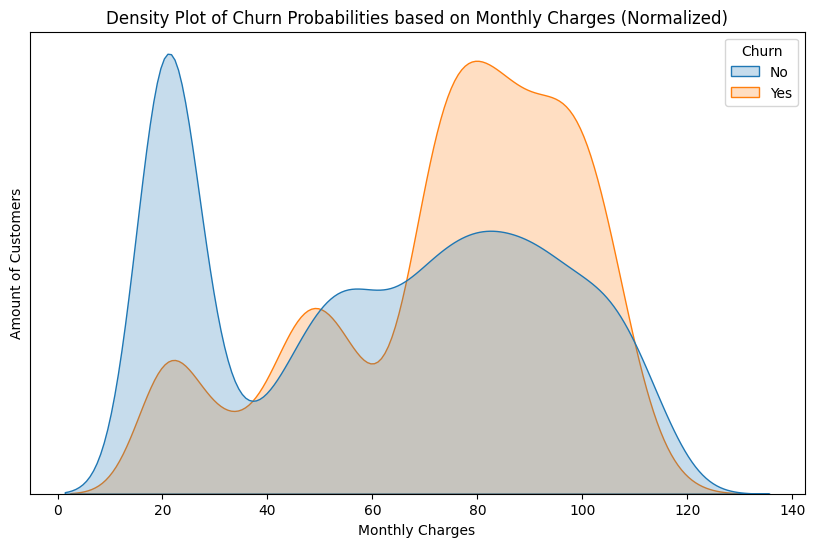

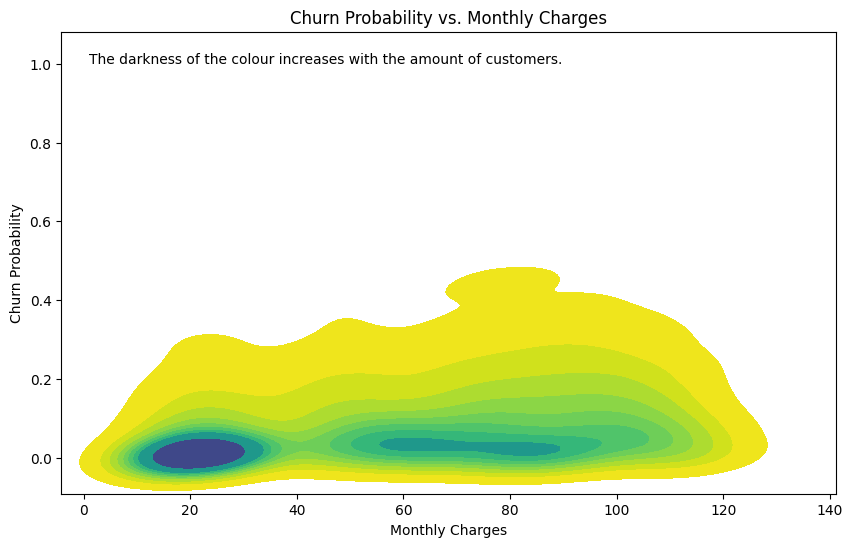

In [6]:
data_to_plot = pd.DataFrame({
    'TotalCharges': non_churned_data['TotalCharges'],
    'tenure': non_churned_data['tenure'],
    'MonthlyCharges': non_churned_data['MonthlyCharges'],
    'ChurnProbability': non_churned_probabilities
})

# Plot the density of customers that either churned or not for TotalCharges, normalized.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='TotalCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Density Plot of Churn Probabilities based on Total Charges (Normalized)')
plt.xlabel('Total Charges')
plt.ylabel('Amount of customers')
plt.gca().set_yticks([])
plt.show()

# Plot the probability of churn, according to the total charges.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_to_plot, x='TotalCharges', y='ChurnProbability', cmap='viridis_r', fill=True, thresh=0.05)
plt.title('Churn Probability vs. Total Charges')
plt.text(1, 1, "The darkness of the colour increases with the amount of customers.")
plt.xlabel('Total Charges')
plt.ylabel('Churn Probability')
plt.show()



# Plot the density of customers that either churned or not for tenure, normalized.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='tenure', hue='Churn', fill=True, common_norm=False)
plt.title('Density Plot of Churn Probabilities based on Tenure (Normalized)')
plt.xlabel('Tenure in Months')
plt.ylabel('Amount of Customers')
plt.gca().set_yticks([])
plt.show()

# Plot the probability of churn, according to the tenure.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_to_plot, x='tenure', y='ChurnProbability', cmap='viridis_r', fill=True, thresh=0.05)
plt.title('Churn Probability vs. Tenure')
plt.text(1, 1, "The darkness of the colour increases with the amount of customers.")
plt.xlabel('Tenure')
plt.ylabel('Churn Probability')
plt.show()



# Plot the density of customers that either churned or not for MonthlyCharges, normalized.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False)
plt.title('Density Plot of Churn Probabilities based on Monthly Charges (Normalized)')
plt.xlabel('Monthly Charges')
plt.ylabel('Amount of Customers')
plt.gca().set_yticks([])
plt.show()

# Plot the probability of churn, according to the monthly charges.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_to_plot, x='MonthlyCharges', y='ChurnProbability', cmap='viridis_r', fill=True, thresh=0.05)
plt.title('Churn Probability vs. Monthly Charges')
plt.text(1, 1, "The darkness of the colour increases with the amount of customers.")
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Probability')
plt.show()

From the first plots, we can gather that a lot of customers are churning after the total charges along with the tenure are low, meaning that they only recently signed up. In contrast, for monthly charges, high monthly charges increase the likelihood of a customer churning.

The density plots reinforce these claims, while providing the additional context that a there is a high density of customers with low monthly charges, a high density of customers with low total charges and a high density of customers with high tenure.

In addition to the top three features, the first feature I would also want to visualize is the Contract, since that is a feature the company can modify and the Month-to-month option is quite an important feature in determining churn. The second feature is TechSupport, which while it has lower importance, can be easily implemented by the company. 

I am visualizing the features using point-biserial correlation, since one of the variables is boolean and the other is continuous.

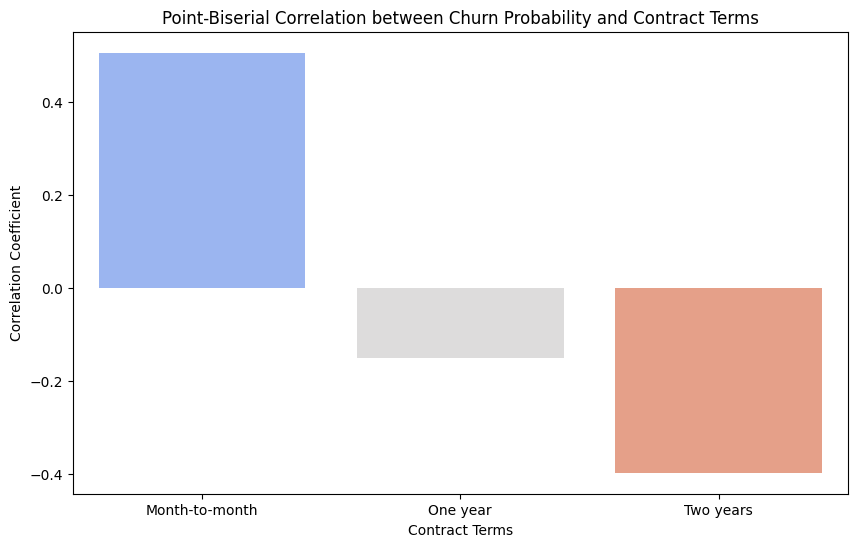

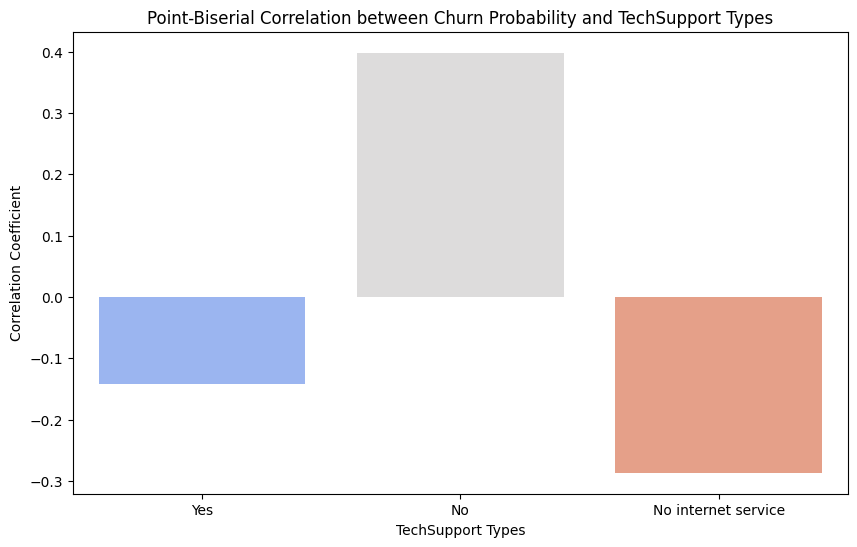

In [7]:
# Calculate point-biserial correlation coefficient between churn probability and each contract term.
corr_contract_month_to_month, _ = pointbiserialr(non_churned_data['Contract_Month-to-month'], data_to_plot['ChurnProbability'])
corr_contract_one_year, _ = pointbiserialr(non_churned_data['Contract_One year'], data_to_plot['ChurnProbability'])
corr_contract_two_year, _ = pointbiserialr(non_churned_data['Contract_Two year'], data_to_plot['ChurnProbability'])

# Plot the correlations.
plt.figure(figsize=(10, 6))
sns.barplot(x=['Month-to-month', 'One year', 'Two years'],
            y=[corr_contract_month_to_month, corr_contract_one_year, corr_contract_two_year], hue=['Month-to-month', 'One year', 'Two years'],
            palette='coolwarm', legend=False)
plt.title('Point-Biserial Correlation between Churn Probability and Contract Terms')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Contract Terms')
plt.show()



# Calculate point-biserial correlation coefficient between churn probability and each techsupport type.
corr_techsupport_yes, _ = pointbiserialr(non_churned_data['TechSupport_Yes'], data_to_plot['ChurnProbability'])
corr_techsupport_no, _ = pointbiserialr(non_churned_data['TechSupport_No'], data_to_plot['ChurnProbability'])
corr_techsupport_no_internet_service, _ = pointbiserialr(non_churned_data['TechSupport_No internet service'], data_to_plot['ChurnProbability'])

# Plot the correlations.
plt.figure(figsize=(10, 6))
sns.barplot(x=['Yes', 'No', 'No internet service'],
            y=[corr_techsupport_yes, corr_techsupport_no, corr_techsupport_no_internet_service], hue=['Yes', 'No', 'No internet service'],
            palette='coolwarm', legend=False)
plt.title('Point-Biserial Correlation between Churn Probability and TechSupport Types')
plt.ylabel('Correlation Coefficient')
plt.xlabel('TechSupport Types')
plt.show()

From the graphs we can deduce, that there is a correlation between the contract term and churn probability: with churn probability increasing, the shorter the contract term. A correlation can also be found in TechSupport types, with the customer who has TechSupport being less likely to churn compared to the one with no TechSupport.

We can conclude, that the company might benefit from a policy of longer contract terms and increased TechSupport availability, in order to reduce customer churn.

Next let's plot the top three features in a 3D plot, in order to better understand the connection these features may have.

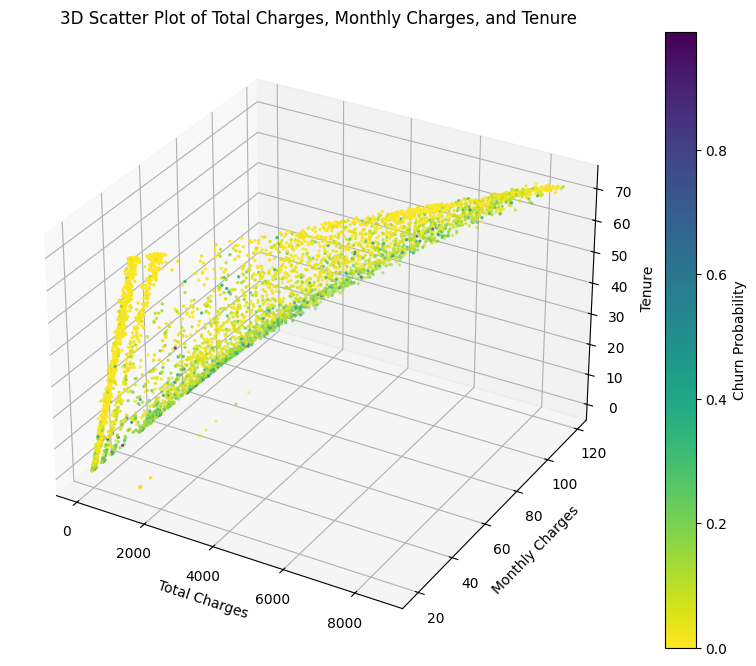

In [8]:
# Let's also plot the three most important features in a 3D scatter plot, with the colour corresponding to the churn probability.

# Assuming data_to_plot contains the required data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Set the size of scatter points
point_size = 2

# Scatter plot with Total Charges, Monthly Charges, and Tenure
sc = ax.scatter(data_to_plot['TotalCharges'], data_to_plot['MonthlyCharges'], data_to_plot['tenure'], c=data_to_plot['ChurnProbability'], cmap='viridis_r', s=point_size)

# Set labels and title
ax.set_xlabel('Total Charges')
ax.set_ylabel('Monthly Charges')
ax.set_zlabel('Tenure')
ax.set_title('3D Scatter Plot of Total Charges, Monthly Charges, and Tenure')

# Add a color bar
cbar = fig.colorbar(sc)
cbar.set_label('Churn Probability')

plt.show()

In the 3D plot, there can be seen some lines with a constant monthly charge and a change in total charge and tenure, signifying the existance of certain payment plans. The highest concentration of customers with a high churn probability exist on the line with the lowest tenure (z-axis), possibly alluding to the importance of customer retention programs in order to reduce churn.

Let's also test, if the three features are indeed independent, by performing linear regression on them.

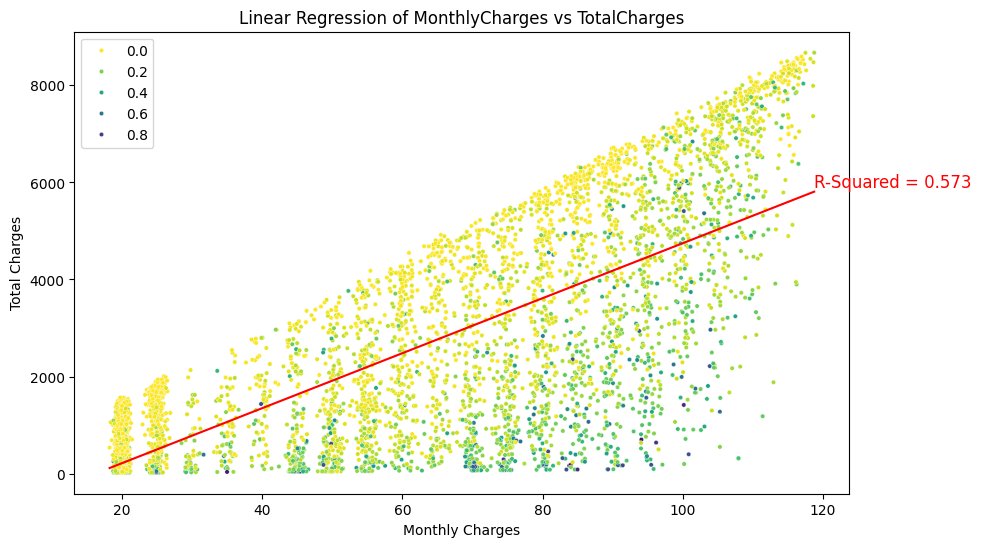

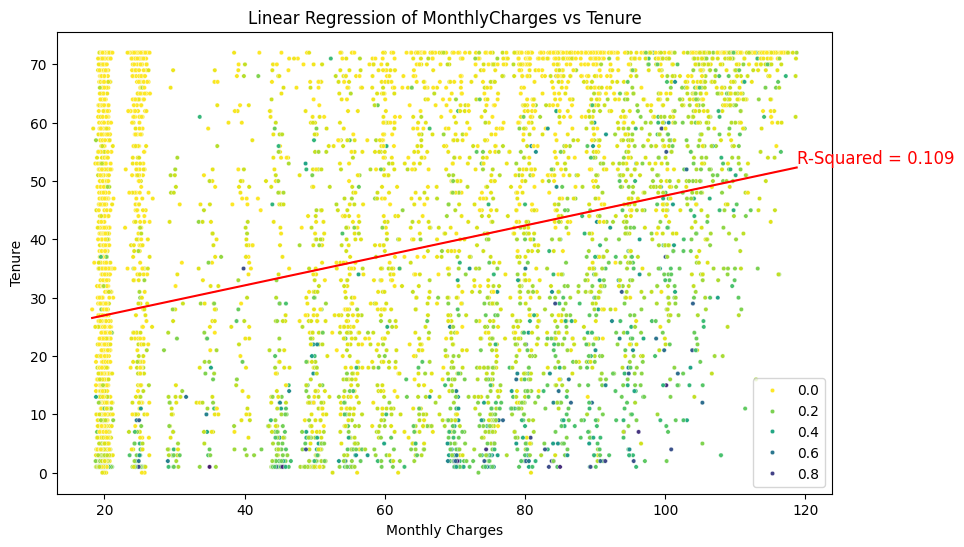

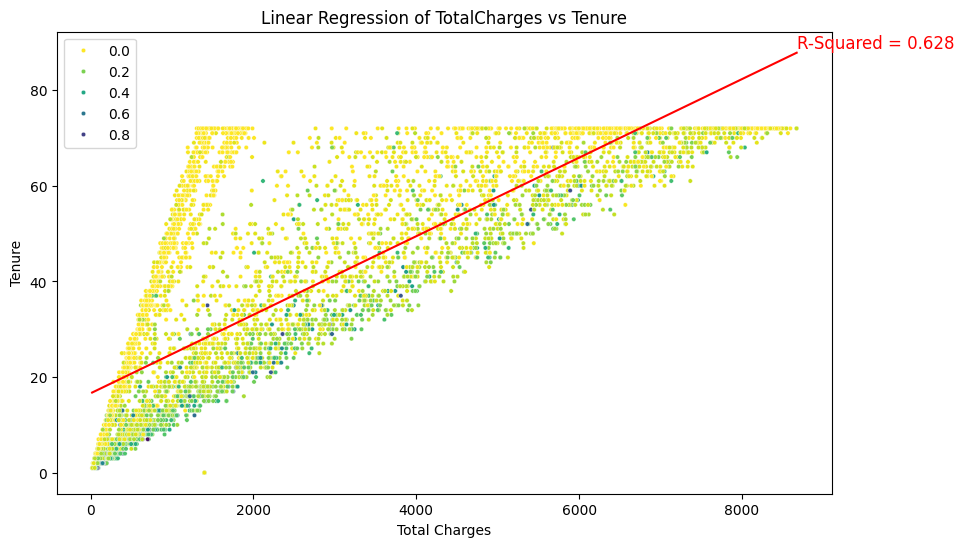

In [9]:
# Linear regression on MonthlyCharges and TotalCharges.

# X represents the independent variable (MonthlyCharges).
X = data_to_plot['MonthlyCharges'].values.reshape(-1, 1)

# y represents the dependent variable (TotalCharges).
y = data_to_plot['TotalCharges']

# Create a Linear Regression model.
model = LinearRegression()

# Fit the model to the data.
model.fit(X, y)

# Make predictions.
predictions = model.predict(X)

# Calculate R-squared.
r_squared = model.score(X, y)

# Plot the data and the linear regression line using Seaborn.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_to_plot, x='MonthlyCharges', y='TotalCharges', hue='ChurnProbability', palette='viridis_r', s=10)
sns.lineplot(x=X.flatten(), y=predictions, color='red')
plt.title('Linear Regression of MonthlyCharges vs TotalCharges')
plt.text(X.max(), predictions.max(), f'R-Squared = {round(r_squared, 3)}', color='red', fontsize=12, verticalalignment='bottom')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()



# Linear regression on Monthly Charges and Tenure.

# X represents the independent variable (MonthlyCharges).
X = data_to_plot['MonthlyCharges'].values.reshape(-1, 1)

# y represents the dependent variable (Tenure).
y = data_to_plot['tenure']

# Create a Linear Regression model.
model = LinearRegression()

# Fit the model to the data.
model.fit(X, y)

# Make predictions.
predictions = model.predict(X)

# Calculate R-squared.
r_squared = model.score(X, y)

# Plot the data and the linear regression line using Seaborn.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_to_plot, x='MonthlyCharges', y='tenure', hue='ChurnProbability', palette='viridis_r', s=10)
sns.lineplot(x=X.flatten(), y=predictions, color='red')
plt.title('Linear Regression of MonthlyCharges vs Tenure')
plt.text(X.max(), predictions.max(), f'R-Squared = {round(r_squared, 3)}', color='red', fontsize=12, verticalalignment='bottom')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()



# Linear regression on Tenure and TotalCharges.

# X represents the independent variable (TotalCharges).
X = data_to_plot['TotalCharges'].values.reshape(-1, 1)

# y represents the dependent variable (Tenure).
y = data_to_plot['tenure']

# Create a Linear Regression model.
model = LinearRegression()

# Fit the model to the data.
model.fit(X, y)

# Make predictions.
predictions = model.predict(X)

# Calculate R-squared.
r_squared = model.score(X, y)

# Plot the data and the linear regression line using Seaborn.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_to_plot, x='TotalCharges', y='tenure', hue='ChurnProbability', palette='viridis_r', s=10)
sns.lineplot(x=X.flatten(), y=predictions, color='red')
plt.title('Linear Regression of TotalCharges vs Tenure')
plt.text(X.max(), predictions.max(), f'R-Squared = {round(r_squared, 3)}', color='red', fontsize=12, verticalalignment='bottom')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.show()

From the linear regressions, we can conclude, that the features are relatively independent, since the value of R-squared is relatively small. The result is interesting, since it concludes that the correlation between Monthly Charges and Total Charges isn't major, which is unintuitive. The scatterplots also once again show, that in general, customers with a high tenure have a lower likelihood of churning.

## Conclusion

The main results of this model was a list of customers likely to churn and the identification of the main features leading to customer churning.

We determined the probability density of customers likely to churn is most concentrated where tenure is low and concluded, that possibly the utilization of customer retention programs might lead to reduced churn.

Since there exists a correlation between increased churn with shorter contract terms and also increased churn with TechSupport unavailability, we can predict that a policy that leads to longer contract terms and makes TechSupport more available might cause a decrease in customer churn.